In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/sentiment_labelled_sentences/yelp_labelled.txt")

In [3]:
yelp_raw = pd.read_table(data_path, header=None)

In [4]:
yelp_raw.columns = ['Review','Rating']

In [8]:
yelp_raw['Rating'] = yelp_raw['Rating'].astype('bool')

In [18]:
keywords = ['bad', 'terrible', 'slow', 'cash', 'cash', 'poor','worst','didn\'t',
                'wouldn\'t','shouldn\'t','rude','don\'t','rather','not']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    yelp_raw[str(key)] = yelp_raw.Review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [19]:
yelp_raw.head()

,Review,Rating,bad,terrible,slow,cash,poor,worst,didn't,wouldn't,shouldn't,rude,don't,rather,not
0,Wow... Loved this place.,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Crust is not good.,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,Not tasty and the texture was just nasty.,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
#yelp_raw = yelp_raw.drop(['gross','awful'], axis=1)

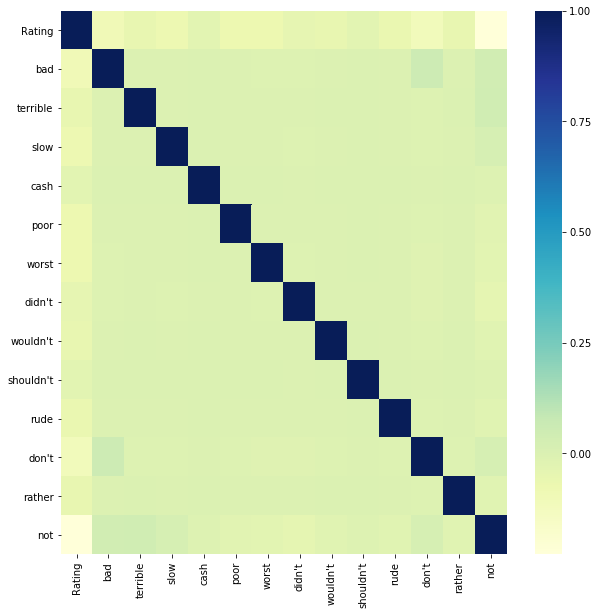

In [20]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(yelp_raw.corr(),cmap="YlGnBu")

In [23]:
data = yelp_raw[keywords]
target = yelp_raw['Rating']

In [24]:
target.head()

0     True
1    False
2    False
3     True
4     True
Name: Rating, dtype: bool

In [25]:
from sklearn.naive_bayes import BernoulliNB

In [26]:
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 375
